<a href="https://colab.research.google.com/github/savirhkhan/Scikit_learn_dump/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Data sets/advertising.csv')

In [6]:
df.shape

(200, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


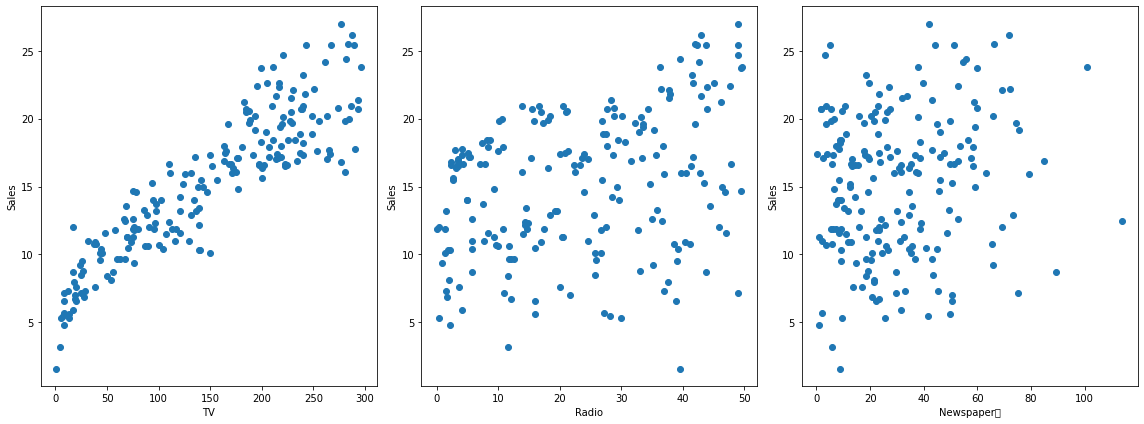

In [10]:

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['Sales'],'o')
axes[0].set_xlabel('TV')
axes[0].set_ylabel('Sales')

axes[1].plot(df['Radio'],df['Sales'],'o')
axes[1].set_xlabel('Radio')
axes[1].set_ylabel('Sales')

axes[2].plot(df['Newspaper'],df['Sales'],'o')
axes[2].set_xlabel('Newspaper	')
axes[2].set_ylabel('Sales')
plt.tight_layout();

**Simple linear Regression using Numpy**

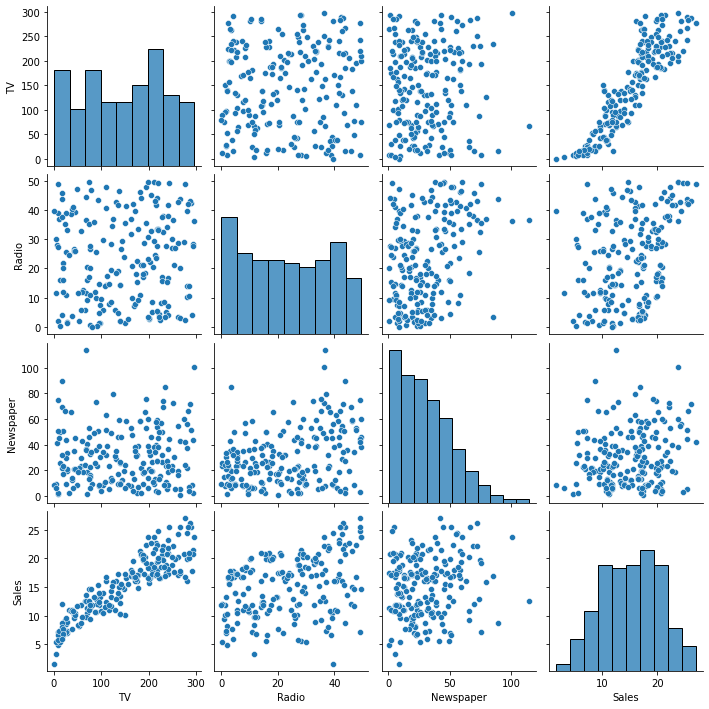

In [11]:
sns.pairplot(df);

In [12]:
X = df.drop('Sales',axis=1)

In [13]:
y = df['Sales']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
my_model = LinearRegression()

In [19]:
my_model.fit(X_train,y_train)

LinearRegression()

In [20]:
test_predict = my_model.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [23]:
mean_absolute_error(y_test,test_predict)

1.3731200698367851

In [24]:
df['Sales'].mean()

15.130500000000005

In [25]:
mean_squared_error(y_test,test_predict)

2.868570633896497

In [26]:
np.sqrt(mean_squared_error(y_test,test_predict))

1.6936855180040058

In [27]:
 # to check if Linear regression is a valid choice
test_residual = y_test- test_predict

In [29]:
test_residual

37     0.786414
109   -1.823432
31    -0.650055
89     1.068963
66     1.906977
119   -0.761668
54    -1.968162
74    -2.017306
145   -2.240349
142   -0.095889
148   -0.210039
112    1.095214
174   -0.689057
55     3.052662
141    0.468735
149    0.264403
25    -2.385042
34     1.854406
170   -0.184636
39     0.362579
172   -0.254670
153   -2.206687
175    2.010152
61     0.826225
65     1.815274
50     0.618408
42    -3.132330
129    0.697208
179    2.835772
2      1.774534
12    -0.225843
133   -0.545707
90     1.462418
22    -1.241043
41    -0.723382
32     3.201044
125   -0.003494
196    3.657685
158   -1.786612
180    1.983263
16     0.790834
186   -2.109298
144    0.953987
121   -0.779131
80     0.135045
18     0.685023
78    -2.895402
48     1.216711
4      2.465911
15     2.087187
1     -0.751880
43     1.096956
102   -1.246645
164   -0.796098
9     -0.209815
155   -2.942007
36     1.290250
190   -0.517865
33    -4.059983
45    -0.469436
Name: Sales, dtype: float64

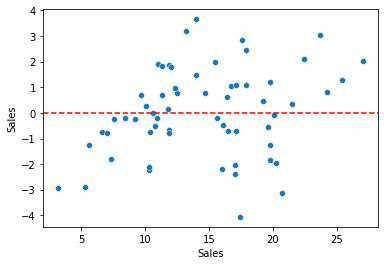

In [31]:
sns.scatterplot(x = y_test,y=test_residual)
plt.axhline(y=0,color='r',ls='--')

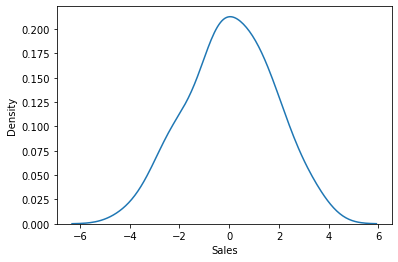

In [32]:
sns.kdeplot(test_residual)

In [33]:
final_model = LinearRegression()

In [36]:
final_model.fit(X,y)

LinearRegression()

In [37]:
final_model.coef_

array([0.05444578, 0.10700123, 0.00033566])

In [38]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [39]:
y_predict = final_model.predict(X)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


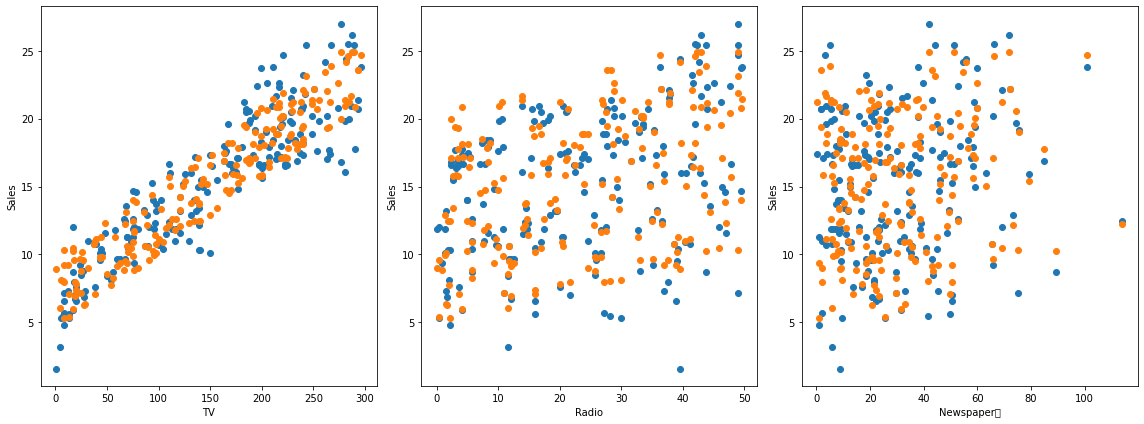

In [41]:

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['Sales'],'o')
axes[0].plot(df['TV'],y_predict,'o')
axes[0].set_xlabel('TV')
axes[0].set_ylabel('Sales')

axes[1].plot(df['Radio'],df['Sales'],'o')
axes[1].plot(df['Radio'],y_predict,'o')
axes[1].set_xlabel('Radio')
axes[1].set_ylabel('Sales')

axes[2].plot(df['Newspaper'],df['Sales'],'o')
axes[2].plot(df['Newspaper'],y_predict,'o')
axes[2].set_xlabel('Newspaper	')
axes[2].set_ylabel('Sales')
plt.tight_layout();

In [42]:
from joblib import dump, load

In [43]:
#trained model
dump(final_model,'final_advertise_model.joblib')

['final_advertise_model.joblib']

In [44]:
#predicting based in values
values = [[100,50,75]]

In [47]:
final_model.predict(values)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([15.44493787])